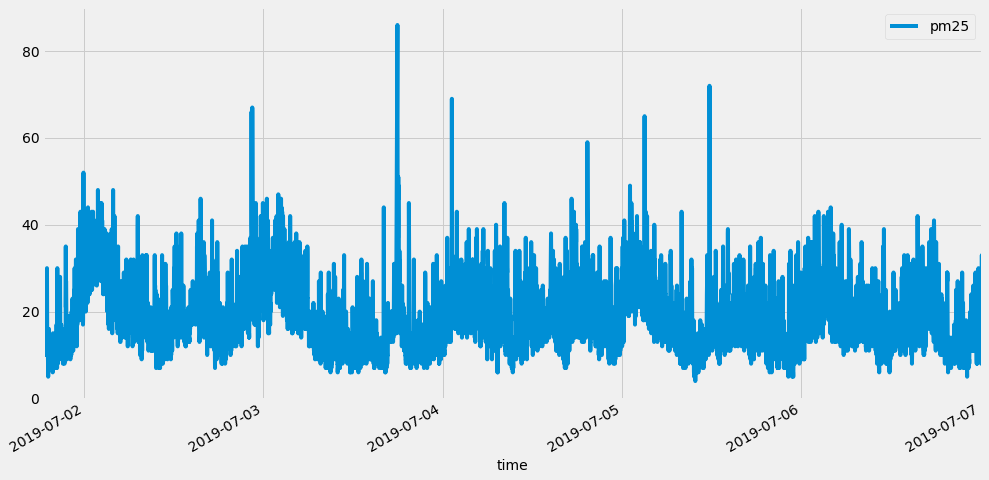

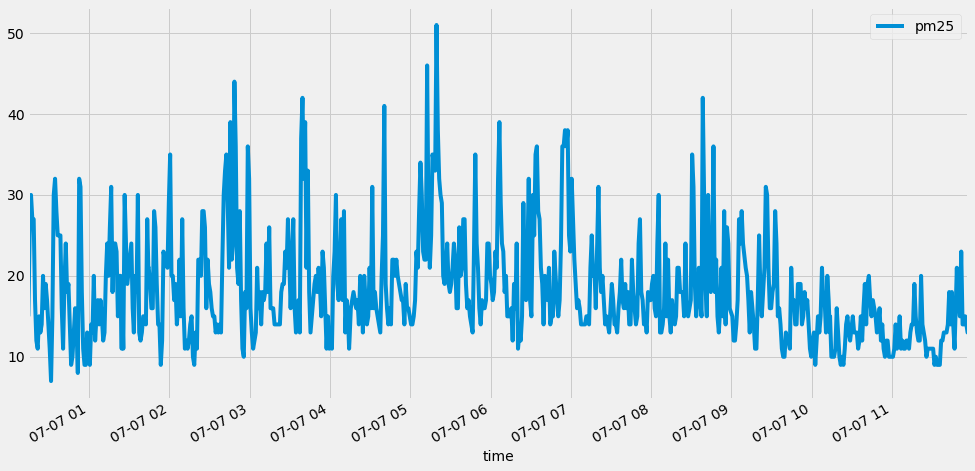

8196

In [42]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

df = pd.read_excel("data.xls")



# Data Preprocessing

cols = ['_id', 'battery', 'distance', 'location', 'name', 'source', 'ward_id']
df.drop(cols, axis=1, inplace=True)
df = df.sort_values('time')

   
df['time'] = pd.to_datetime(df['time'], unit='ms')


df = df[['time','pm25']]
df.isnull().sum()

test1=df[7500:]
test_xcoord = test1['time'].dt.time.to_numpy()
test_xcoord



df = df.groupby('time')['pm25'].mean().reset_index()
df = df.set_index('time')
df.index



train=df[0:7500] 
test=df[7500:]




train.plot(figsize=(15,8), fontsize=14)
test.plot(figsize=(15,8), fontsize=14)
plt.show()
test_xcoord
len(df)

In [43]:

import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [44]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [45]:

look_back = 1
training_set = train.iloc[:].values
testing_set = test.iloc[:].values
training_set
testing_set
trainX, trainY = create_dataset(training_set, look_back)
testX, testY = create_dataset(testing_set, look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 16s - loss: 215.9579
Epoch 2/100
 - 15s - loss: 58.5197
Epoch 3/100
 - 14s - loss: 35.6554
Epoch 4/100
 - 14s - loss: 30.6102
Epoch 5/100
 - 13s - loss: 29.0034
Epoch 6/100
 - 14s - loss: 28.2822
Epoch 7/100
 - 14s - loss: 27.9135
Epoch 8/100
 - 13s - loss: 27.6660
Epoch 9/100
 - 13s - loss: 27.3740
Epoch 10/100
 - 14s - loss: 27.3106
Epoch 11/100
 - 14s - loss: 27.1743
Epoch 12/100
 - 13s - loss: 27.1615
Epoch 13/100
 - 13s - loss: 27.1181
Epoch 14/100
 - 13s - loss: 27.0909
Epoch 15/100
 - 13s - loss: 26.9850
Epoch 16/100
 - 14s - loss: 26.9151
Epoch 17/100
 - 14s - loss: 26.9475
Epoch 18/100
 - 15s - loss: 26.8972
Epoch 19/100
 - 14s - loss: 26.9011
Epoch 20/100
 - 14s - loss: 26.8613
Epoch 21/100
 - 16s - loss: 26.8526
Epoch 22/100
 - 14s - loss: 26.7709
Epoch 23/100
 - 14s - loss: 26.6879
Epoch 24/100
 - 14s - loss: 26.7888
Epoch 25/100
 - 14s - loss: 26.7506
Epoch 26/100
 - 15s - loss: 26.7254
Epoch 27/100
 - 14s - loss: 26.7283
Epoch 28/100
 - 15s - loss: 26.7311


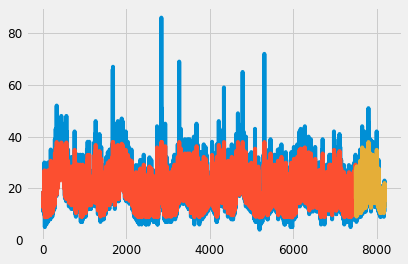

In [46]:

#scaler = MinMaxScaler(feature_range=(0, 1))
#dataset = scaler.fit_transform(df)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
#trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform([trainY])
#testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])
# calculate root mean squared error
#trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
#print('Train Score: %.2f RMSE' % (trainScore))
#testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
#print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot((df.values))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [47]:
testPredict

array([[15.943665 ],
       [23.447308 ],
       [26.956356 ],
       [24.826248 ],
       [24.826248 ],
       [17.435246 ],
       [13.453754 ],
       [12.469953 ],
       [15.943665 ],
       [14.347928 ],
       [15.169148 ],
       [19.690351 ],
       [16.693787 ],
       [18.928726 ],
       [17.435246 ],
       [15.169148 ],
       [12.469953 ],
       [ 9.080254 ],
       [15.943665 ],
       [26.956356 ],
       [28.413528 ],
       [25.528381 ],
       [23.447308 ],
       [23.447308 ],
       [23.447308 ],
       [16.693787 ],
       [12.469953 ],
       [18.928726 ],
       [22.771027 ],
       [18.17818  ],
       [18.928726 ],
       [15.169148 ],
       [10.414188 ],
       [11.422211 ],
       [14.347928 ],
       [16.693787 ],
       [15.169148 ],
       [ 9.6003065],
       [28.413528 ],
       [27.681477 ],
       [18.17818  ],
       [12.469953 ],
       [10.414188 ],
       [10.414188 ],
       [14.347928 ],
       [13.453754 ],
       [10.414188 ],
       [15.16

In [48]:
testX

array([[[15]],

       [[25]],

       [[30]],

       [[27]],

       [[27]],

       [[17]],

       [[12]],

       [[11]],

       [[15]],

       [[13]],

       [[14]],

       [[20]],

       [[16]],

       [[19]],

       [[17]],

       [[14]],

       [[11]],

       [[ 7]],

       [[15]],

       [[30]],

       [[32]],

       [[28]],

       [[25]],

       [[25]],

       [[25]],

       [[16]],

       [[11]],

       [[19]],

       [[24]],

       [[18]],

       [[19]],

       [[14]],

       [[ 9]],

       [[10]],

       [[13]],

       [[16]],

       [[14]],

       [[ 8]],

       [[32]],

       [[31]],

       [[18]],

       [[11]],

       [[ 9]],

       [[ 9]],

       [[13]],

       [[12]],

       [[ 9]],

       [[14]],

       [[13]],

       [[20]],

       [[12]],

       [[15]],

       [[17]],

       [[14]],

       [[17]],

       [[15]],

       [[12]],

       [[13]],

       [[20]],

       [[24]],

       [[20]],

       [[26]],

       [

In [49]:
mse = ((testPredict - testX) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 69.26


In [50]:
# Visualising the results
plt.figure(figsize=(15,5))
plt.plot(test_xcoord,testX, color = 'red', label = 'Real pm25 values')
plt.plot(test_xcoord,testPredict, color = 'blue', label = 'Predicted pm25 values')
plt.title('Time Series Prediction')
plt.xlabel('(Date-07-07-2019)  Time')
plt.ylabel('pm25 values(ug/m3)')
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (696,) and (694, 1, 1)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001FE84535798> (for post_execute):


ValueError: microsecond must be in 0..999999

ValueError: microsecond must be in 0..999999

<Figure size 1080x360 with 1 Axes>